# Exercise 03 - Autoregressive Integrated Moving Average Models

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf


df = pd.read_csv('../EjerciciosModelosAvanzados1/data_arma.csv', index_col=0)
df.head()

,ts1,ts2,ts3,ts4
0,0.533570,-0.126804,-0.802837,1.812825
1,1.240130,1.314360,-0.595602,0.042764
2,1.618598,1.405994,0.127180,-1.759427
3,1.140465,3.132621,0.958586,-0.456798
4,0.481561,3.179083,0.164598,-1.254790


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 4 columns):
ts1    500 non-null float64
ts2    500 non-null float64
ts3    500 non-null float64
ts4    500 non-null float64
dtypes: float64(4)
memory usage: 19.5 KB


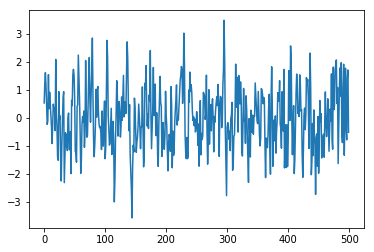

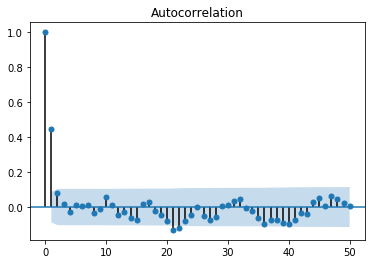

In [16]:
df['ts1'].plot()
plot_acf(df['ts1'], lags=50);

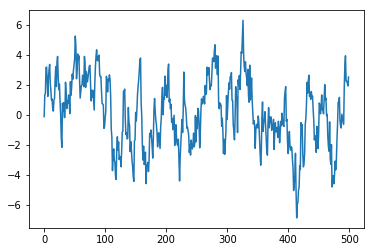

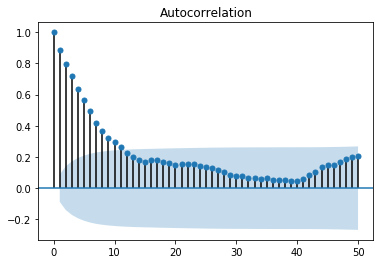

In [17]:
df['ts2'].plot()
plot_acf(df['ts2'], lags=50);

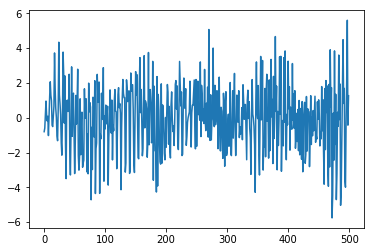

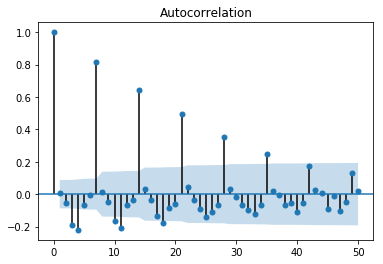

In [18]:
df['ts3'].plot()
plot_acf(df['ts3'], lags=50);

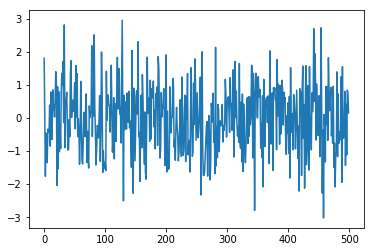

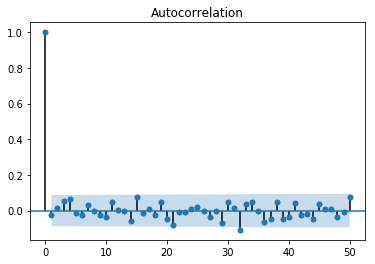

In [19]:
df['ts4'].plot()
plot_acf(df['ts4'], lags=50);

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the mse of the rolling forecast


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


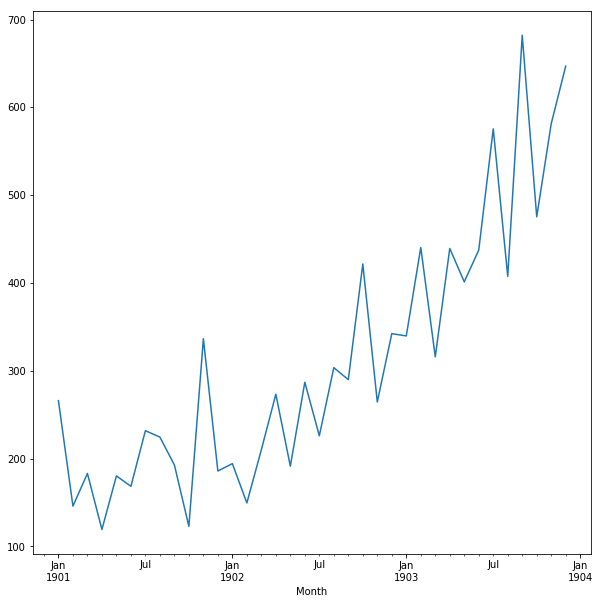

In [9]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('../EjerciciosModelosAvanzados1/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot(figsize=(10, 10));

In [20]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [21]:
# fit model
    # No todas las combinaciones de los parámetros son factibles.
for ma in range(7):
    for ar in range(ma + 1, 8):
        # Predicciones y sobre test
        X = series.values
        size = int(len(X) * 0.66)
        train, test = X[0:size], X[size:len(X)]
        history = [x for x in train]
        predictions = list()
        for t in range(len(test)):
            model = ARIMA(history, order=(ar, 1, ma))
            model_fit = model.fit(disp=0)
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t]
            history.append(obs)
        error = mean_squared_error(test, predictions)     
        print('p:', ar, '- d: 1 - q:', ma,'- Test MSE: %.3f' % error) 

NameError: name 'ARIMA' is not defined